        id_code  diagnosis
0  000c1434d8d7          2
1  001639a390f0          4
2  0024cdab0c1e          1
3  002c21358ce6          0
4  005b95c28852          0


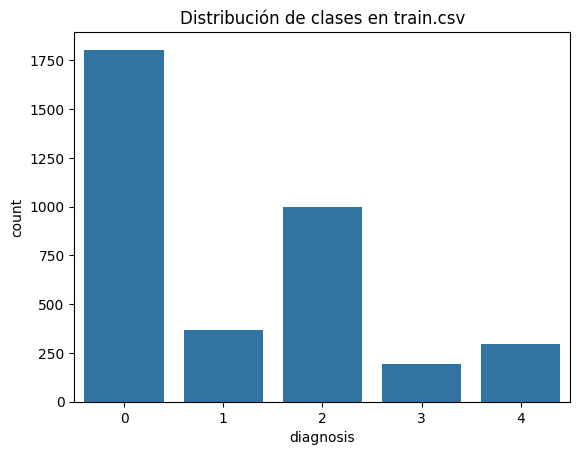

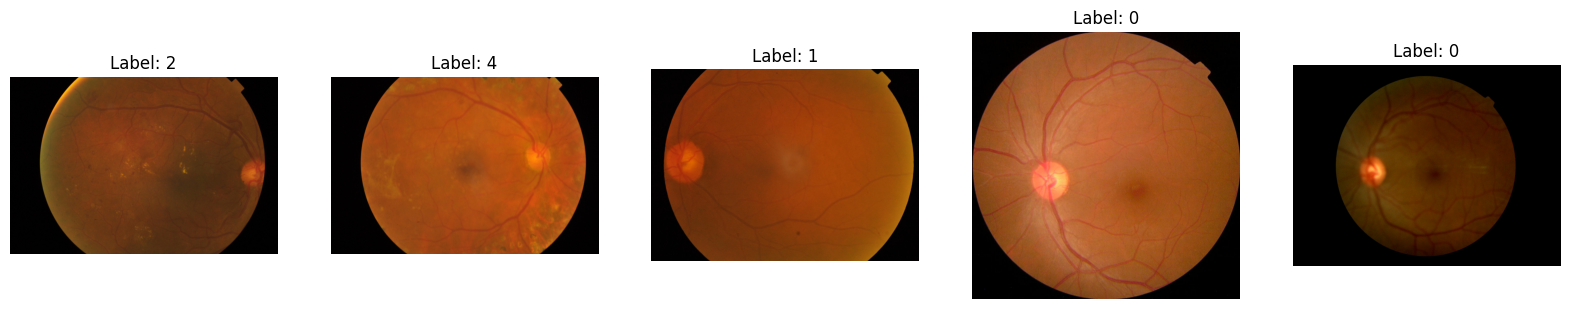

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Data upload
train_df = pd.read_csv('../data/raw/train.csv')

# Lines check
print(train_df.head())

# Class distribution
sns.countplot(x='diagnosis', data=train_df)
plt.title('Distribución de clases en train.csv')
plt.show()

# Sample images
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
for i, ax in enumerate(axes):
    img_path = f"../data/raw/train_images/{train_df.loc[i, 'id_code']}.png"
    img = Image.open(img_path)
    ax.imshow(img)
    ax.set_title(f"Label: {train_df.loc[i, 'diagnosis']}")
    ax.axis('off')
plt.show()